<h2 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: red; background-color: #ffffff;">TABLE OF CONTENTS</h2>


<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#intro">I&nbsp;&nbsp;&nbsp;&nbsp;Introduction</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#import">II&nbsp;&nbsp;&nbsp;&nbsp;Import and utility</a></h3>

---


<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#world">V&nbsp;&nbsp;&nbsp;&nbsp;Focus on the World</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#europe">VI&nbsp;&nbsp;&nbsp;&nbsp;Focus on the Europe </a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#FR_dfnce">VII&nbsp;&nbsp;&nbsp;&nbsp;Focus on FR_dfnce</a></h3>


<h1 class="list-group-item list-group-item-action active" id="intro">I&nbsp;&nbsp;Introduction</h1>

Covid19vaccination world and EU + focus on FR_dfnce


**Coronaviruses are a group of related viruses that can cause respiratory infections in humans, ranging from mild symptoms to fatal consequences. To date, seven coronaviruses are known to infect humans. **

*SARS-CoV-2 is a novel coronavirus that causes coronavirus disease 2019 (COVID-19), the worst pandemic of this century. Due to the high mortality rate and rapid spread, an effective vaccine is urgently needed to control the epidemic. As a result, academia, industry and government are working closely together to develop and test various vaccines at unprecedented speed. We will provide a brief overview of the progress of vaccination in the world and provide feedback on these questions:*

1. What vaccines are used globally?
1. What is the situation in Europe?
1. What is the situation in FR_dfnce?


## This dataset includes information about:

* **Country** - this is the country for which the vaccination information is provided;     
* **Country ISO Code** - ISO code for the country;   
* **Date**- date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;   
* **Total number of vaccin ations** - this is the absolute number of total immunizations in the country;  
* **Total number of people vaccinated** - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;  
* **Total number of people fully vaccinated** - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;  
* **Daily vaccinations (raw)** - for a certain data entry, the number of vaccination for that date/country;  
* **Daily vaccinations** - for a certain data entry, the number of vaccination for that date/country;  
* **Total vaccinations per hundred** - ratio (in percent) between vaccination number and total population up to the date in the country;  
* **Total number of people vaccinated per hundred** - ratio (in percent) between population immunized and total population up to the date in the country;  
* **Total number of people fully vaccinated per hundred** - ratio (in percent) between population fully immunized and total population up to the date in the country;   
* **Number of vaccinations per day** - number of daily vaccination for that day and country;   
* **Daily vaccinations per million** -  ratio (in ppm) between vaccination number and total population for the current date in the country;    
* **Vaccines used in the country** - total number of vaccines used in the country (up to date);    
* **Source name** - source of the information (national authority, international organization, local organization etc.);   
* **Source website** - website of the source of information;  


<h1 class="list-group-item list-group-item-action active" id="import">II&nbsp;&nbsp;Import and utility</h1>

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
import geopandas
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(20,20)})


In [3]:
import geopandas as gpd
FR_dep_df = gpd.read_file('../data/departements.geojson')
display(FR_dep_df)
FR_dep_df['value'] = np.random.randint(1, 10, FR_dep_df.shape[0])

code                    nom  \
0    02                  Aisne   
1    10                   Aube   
2    14               Calvados   
3    15                 Cantal   
4    28           Eure-et-Loir   
..  ...                    ...   
91   41           Loir-et-Cher   
92   53                Mayenne   
93   54     Meurthe-et-Moselle   
94   79            Deux-Sèvres   
95   90  Territoire de Belfort   

                                             geometry  
0   POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...  
1   POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...  
2   POLYGON ((-1.11962 49.35557, -1.11503 49.36240...  
3   POLYGON ((2.50841 45.47850, 2.52444 45.48070, ...  
4   POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...  
..                                                ...  
91  POLYGON ((0.84122 48.10306, 0.87588 48.10943, ...  
92  POLYGON ((-0.86036 48.50146, -0.84611 48.49828...  
93  MULTIPOLYGON (((5.45556 49.48093, 5.44953 49.4...  
94  POLYGON ((-0.89196 46.97582, -0.87973 46.97580...  
95  POLYGON ((6.82353 47.81305, 6.83931 47.82478, ...  

[96 rows x 3 columns]

In [4]:
df = pd.read_csv("../data/country_vaccinations.csv")

In [5]:
df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

In [6]:
df["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [7]:
eu_country = [
    "Austria",
    "Belgium",
    "Bulgaria",
    "Croatia", 
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "FR_dfnce", 
    "Germany", 
    "Greece", 
    "Hungary",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg", 
    "Malta",
    "Netherlands",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden"
]

In [8]:
eu_country_in_df =[coun for i,coun in enumerate(eu_country) if coun in df["country"].unique()]
     

In [9]:
eu_country_in_df

['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Denmark',
 'Estonia',
 'Finland',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden']

In [10]:
new_df = df.groupby(["country",'iso_code','vaccines'])['total_vaccinations','people_vaccinated','people_fully_vaccinated',
                                           'daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                                           "people_fully_vaccinated_per_hundred",'daily_vaccinations_per_million'].max().reset_index()
new_df.head()



country iso_code                                           vaccines  \
0  Afghanistan      AFG  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Albania      ALB  Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...   
2      Algeria      DZA  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...   
3      Andorra      AND       Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
4       Angola      AGO                                 Oxford/AstraZeneca   

   total_vaccinations  people_vaccinated  people_fully_vaccinated  \
0           5751015.0          5082824.0                4420127.0   
1           2754244.0          1278902.0                1215199.0   
2          13704895.0          7461932.0                6110712.0   
3            151997.0            57817.0                  53367.0   
4          17535411.0         11235059.0                5993792.0   

   daily_vaccinations  total_vaccinations_per_hundred  \
0             70761.0                           14.44   
1             17565.0                           95.87   
2            256927.0                           30.72   
3              1762.0                          196.50   
4            183173.0                           51.68   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          12.76                                11.10   
1                          44.52                                42.30   
2                          16.72                                13.70   
3                          74.74                                68.99   
4                          33.11                                17.66   

   daily_vaccinations_per_million  
0                          1776.0  
1                          6114.0  
2                          5759.0  
3                         22778.0  
4                          5398.0

In [23]:
df_per = df[df['country'].isin(eu_country_in_df)]
df_per = df_per.sort_values(by="people_vaccinated_per_hundred",ascending=False,ignore_index=True)
unique_country_vac_list = []

country = []
value = []
for i in range(len(eu_country_in_df)):
    a = df_per.iloc[0]["country"]
    b = df_per.iloc[0]["people_vaccinated_per_hundred"]
    country.append(a)
    value.append(b)
    df_per = df_per.drop(df_per[df_per["country"] == a].index)
    df_per = df_per.reset_index(drop=True)


def make_time(date):
    date = str(date).split(" ")[0]
    return date.replace("-","")


df_process= df[df['country'].isin(country[0:5])]
t = df_process[~df_process["people_vaccinated_per_hundred"].isnull()][["country","date","people_vaccinated_per_hundred"]]
t["date"] = t["date"].map(make_time)

t["date_count"] = t["date"].apply(lambda d: len(t[t["date"] == d]))

t = t[t["date_count"] == 5]  
print(t) 

       country      date  people_vaccinated_per_hundred  date_count
20867  Denmark  20210118                           2.70           5
20868  Denmark  20210119                           2.74           5
20869  Denmark  20210120                           2.77           5
20870  Denmark  20210121                           2.79           5
20871  Denmark  20210122                           2.80           5
...        ...       ...                            ...         ...
73741    Spain  20220222                          87.78           5
73748    Spain  20220301                          87.87           5
73749    Spain  20220302                          87.88           5
73750    Spain  20220303                          87.89           5
73757    Spain  20220310                          87.90           5

[930 rows x 4 columns]


<h1 class="list-group-item list-group-item-action active" id="world">III&nbsp;&nbsp;Focus on world</h1>

In [24]:
data = new_df[['country','total_vaccinations']].nlargest(20,'total_vaccinations')
fig = px.bar(data, x = 'country', y = 'total_vaccinations',title="Number of total vaccinations according to countries", template="plotly_dark")
fig.show()

In [25]:
data = new_df[['country','people_vaccinated']].nlargest(20,'people_vaccinated')
fig = px.bar(data, x = 'country',y = 'people_vaccinated',title="Number of people vaccinated according to countries",template="plotly_dark")
fig.show()

In [26]:
fig = px.choropleth(df, locations = "iso_code",
                    color = "vaccines", 
                    hover_name = df.index,
                    width=1000, height=1000)
fig.update_layout(title_x = 0.5, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout({'legend_title':'Vaccine scheme'})
fig.show()



In [27]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending=True)
df['date'] = df['date'].dt.strftime('%m-%d-%Y')
tdf = df.copy()
for iso_code in tdf['iso_code'].unique():
    tdf.loc[tdf['iso_code'] == iso_code, :] = tdf.loc[tdf['iso_code'] == iso_code, :].fillna(method='ffill').fillna(0)

In [28]:
fig = px.choropleth(
    tdf,                            # Input DataFR_dfme
    locations="iso_code",           # identify country code column
    color="total_vaccinations_per_hundred",                     # identify representing column
    hover_name="country",              # identify hover name
    animation_FR_dfme="date",
    color_continuous_scale= 'rainbow',
    projection="natural earth",        # select projection
    range_color=[0,5000000],
    title='<span style="font-size:36px; font-family:Arial">Number of vaccinations per hundred per country</span>',
)             # select range of dataset     
fig.show()

In [29]:
fig = px.choropleth(
    tdf,                            # Input DataFR_dfme
    locations="iso_code",           # identify country code column
    color="total_vaccinations",                     # identify representing column
    hover_name="country",              # identify hover name
    animation_FR_dfme="date",
    color_continuous_scale='rainbow',
    projection="natural earth",        # select projection
    range_color=[0,5000000],
    title='<span style="font-size:36px; font-family:Arial">Number of vaccinations per country</span>',
)             # select range of dataset     
fig.show()

In [30]:
vaccince_types = df.groupby(['vaccines'])['iso_code'].unique()
vaccince_types = vaccince_types.reset_index()
vaccince_types

vaccines         iso_code
0   Abdala, Johnson&Johnson, Oxford/AstraZeneca, P...            [NIC]
1   Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...            [VNM]
2   Abdala, Sinopharm/Beijing, Sinovac, Soberana02...            [VEN]
3                   Abdala, Soberana Plus, Soberana02            [CUB]
4   COVIran Barekat, Covaxin, FAKHRAVAC, Oxford/As...            [IRN]
..                                                ...              ...
79                 Pfizer/BioNTech, Sinovac, Turkovac            [TUR]
80                         Pfizer/BioNTech, Sputnik V            [SMR]
81               QazVac, Sinopharm/Beijing, Sputnik V            [KAZ]
82                                  Sinopharm/Beijing  [GNQ, TCD, BDI]
83                       Sinopharm/Beijing, Sputnik V       [BLR, KGZ]

[84 rows x 2 columns]

In [31]:
unique_brands=[]
brands=[brand.split(', ') for brand in set(df["vaccines"])]
for e in brands:
    for i in e:
        unique_brands.append(i)

In [32]:
unique_brands = np.unique(unique_brands)

In [33]:
unique_brands

array(['Abdala', 'COVIran Barekat', 'CanSino', 'Covaxin', 'EpiVacCorona',
       'FAKHRAVAC', 'Johnson&Johnson', 'Medigen', 'Moderna', 'Novavax',
       'Oxford/AstraZeneca', 'Pfizer/BioNTech', 'QazVac', 'Razi Cov Pars',
       'Sinopharm/Beijing', 'Sinopharm/Wuhan', 'Sinovac', 'Soberana Plus',
       'Soberana02', 'SpikoGen', 'Sputnik Light', 'Sputnik V', 'Turkovac',
       'ZF2001'], dtype='<U18')

In [34]:
vaccince_types["vaccines"]


0     Abdala, Johnson&Johnson, Oxford/AstraZeneca, P...
1     Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...
2     Abdala, Sinopharm/Beijing, Sinovac, Soberana02...
3                     Abdala, Soberana Plus, Soberana02
4     COVIran Barekat, Covaxin, FAKHRAVAC, Oxford/As...
                            ...                        
79                   Pfizer/BioNTech, Sinovac, Turkovac
80                           Pfizer/BioNTech, Sputnik V
81                 QazVac, Sinopharm/Beijing, Sputnik V
82                                    Sinopharm/Beijing
83                         Sinopharm/Beijing, Sputnik V
Name: vaccines, Length: 84, dtype: object

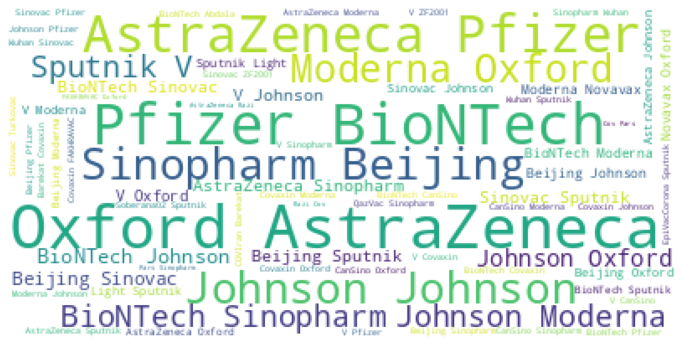

In [35]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.vaccines))

plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [36]:
fig = px.treemap(new_df,names = 'country',values = 'total_vaccinations',path = ['vaccines','country'],
                 title="Total Vaccinations per country grouped by Vaccines",
                 color_discrete_sequence =px.colors.qualitative.Set1)
fig.show()


In [38]:
countries = df.country.unique()
totalVacc = sum(df['total_vaccinations'])
totalVacc


# Total Vaccinations for countries

total = {}
for country in countries:
    sumC = 0
    for index, row in df.iterrows():
        if row['country'] == country:
            sumC = sumC + row['total_vaccinations']
    total[country] = sumC
total



KeyboardInterrupt: 

### Distribution of vaccins around the world

In [ ]:
country_vac_df = df[['country', 'iso_code','vaccines']]
temp_filter_mask = country_vac_df.duplicated()
filter_mask = [not index for index in temp_filter_mask]
unique_country_vac_df = country_vac_df[filter_mask]
unique_country_vac_df

country  iso_code  \
7360                             Wales  OWID_WLS   
2119                           England  OWID_ENG   
6048                          Scotland  OWID_SCT   
7121                    United Kingdom       GBR   
4944                  Northern Ireland  OWID_NIR   
...                                ...       ...   
503                            Bahamas       BHS   
4261                            Malawi       MWI   
5950  Saint Vincent and the Grenadines       VCT   
3906                              Laos       LAO   
2918                            Guinea       GIN   

                                 vaccines  
7360  Oxford/AstraZeneca, Pfizer/BioNTech  
2119  Oxford/AstraZeneca, Pfizer/BioNTech  
6048  Oxford/AstraZeneca, Pfizer/BioNTech  
7121  Oxford/AstraZeneca, Pfizer/BioNTech  
4944  Oxford/AstraZeneca, Pfizer/BioNTech  
...                                   ...  
503                    Oxford/AstraZeneca  
4261                   Oxford/AstraZeneca  
5950                   Oxford/AstraZeneca  
3906         Sinopharm/Beijing, Sputnik V  
2918                            Sputnik V  

[150 rows x 3 columns]

In [ ]:
unique_country_vac_list = []

def transform_vacs_to_vac(data):
    # If the country uses only one type of vaccine brand, directly insert to new dataFR_dfme.
    # Else split them and insert to new dataFR_dfme separately
    
    if "," in data['vaccines']:
        vacs = data['vaccines'].split(", ")
        
        for vac in vacs:
            temp = {'country': data['country'], 'iso_code': data['iso_code'], 'vaccines': vac}
            unique_country_vac_list.append(temp)
    else:
        temp = {'country': data['country'], 'iso_code': data['iso_code'], 'vaccines': data['vaccines']}
        unique_country_vac_list.append(temp)
    
for index, row in unique_country_vac_df.iterrows():
    transform_vacs_to_vac(row)

unique_country_vac_df2 = pd.DataFR_dfme(unique_country_vac_list)
unique_country_vac_df2.tail(10)

country iso_code            vaccines
247                            Uganda      UGA  Oxford/AstraZeneca
248                           Jamaica      JAM  Oxford/AstraZeneca
249                           Tunisia      TUN           Sputnik V
250                 Equatorial Guinea      GNQ   Sinopharm/Beijing
251                           Bahamas      BHS  Oxford/AstraZeneca
252                            Malawi      MWI  Oxford/AstraZeneca
253  Saint Vincent and the Grenadines      VCT  Oxford/AstraZeneca
254                              Laos      LAO   Sinopharm/Beijing
255                              Laos      LAO           Sputnik V
256                            Guinea      GIN           Sputnik V

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
def one_vac_per_country(data, vac_name):
    for index, row in unique_country_vac_df2.iterrows():
        if data['iso_a3'] == row['iso_code'] and row['vaccines'] == vac_name:
            return vac_name


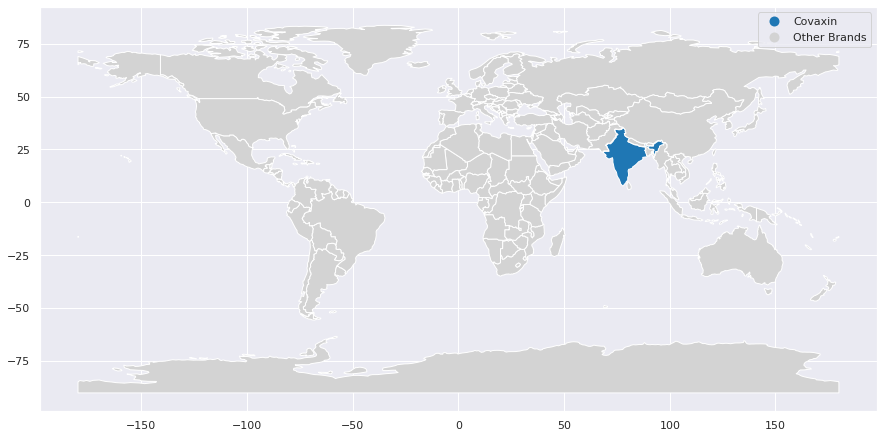

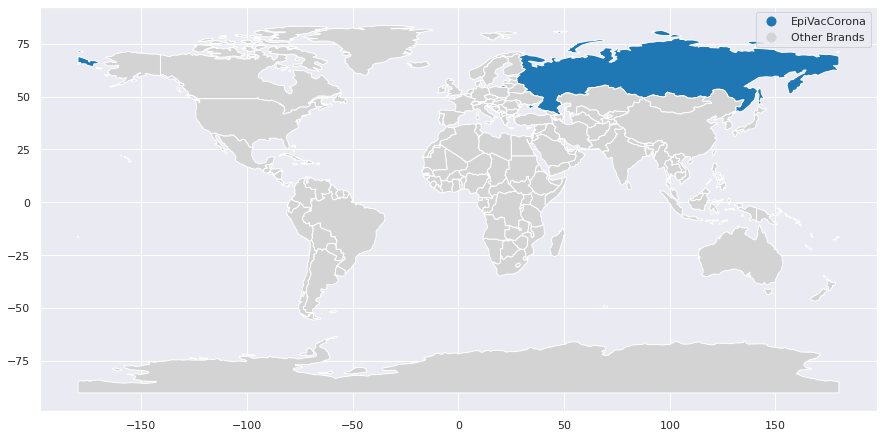

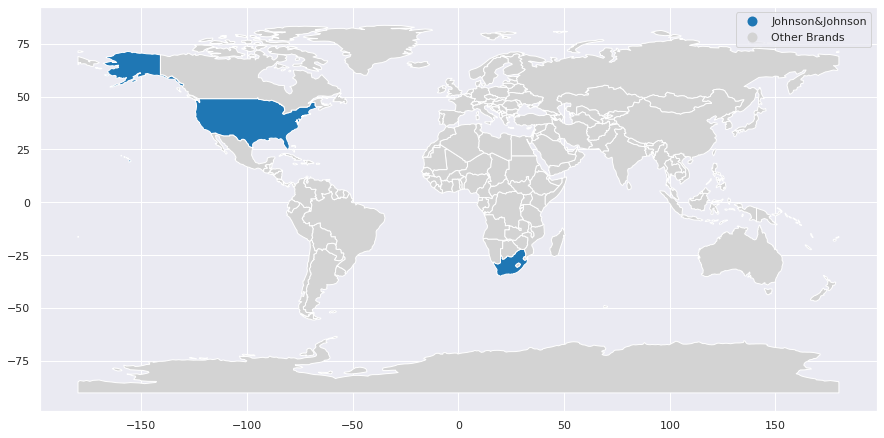

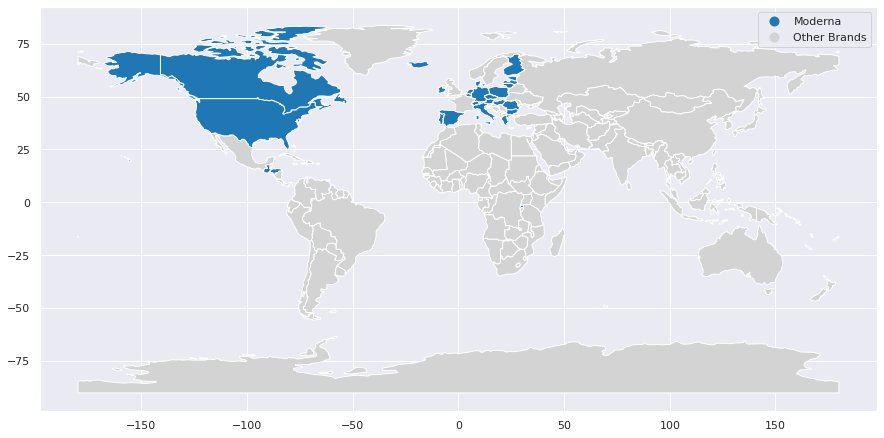

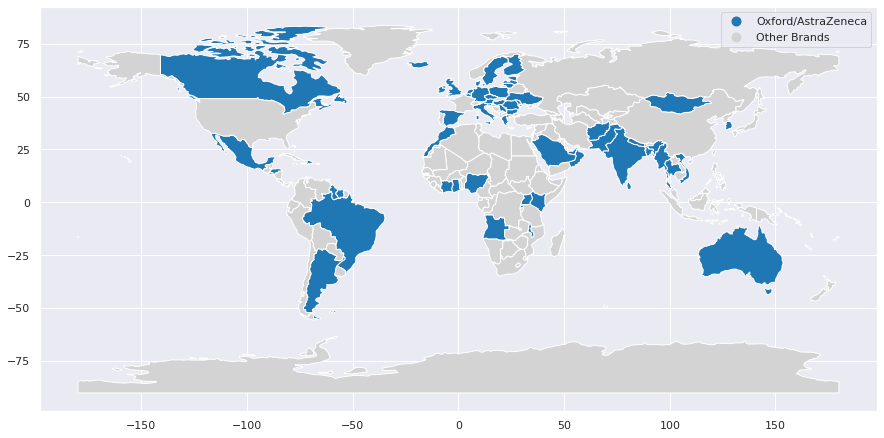

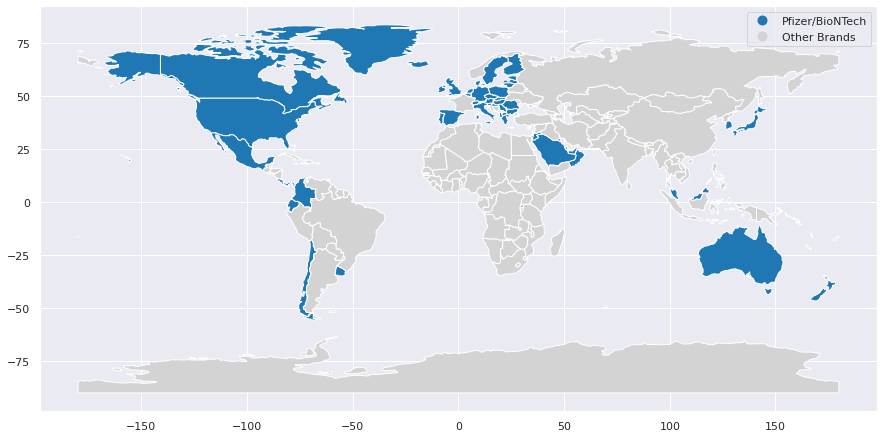

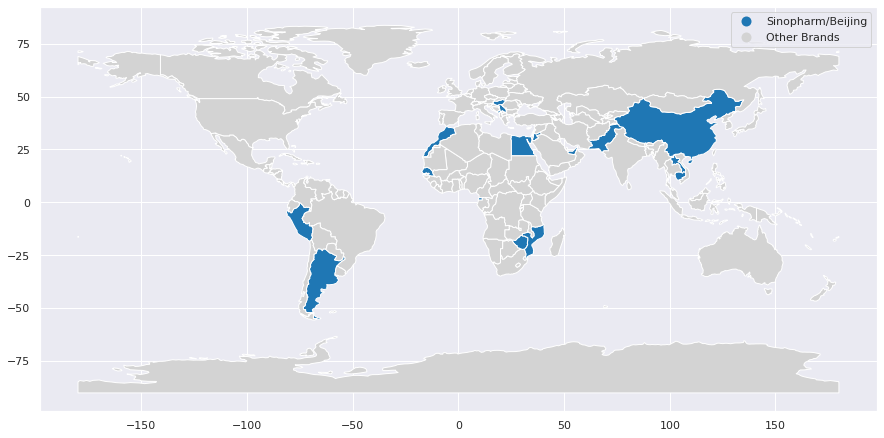

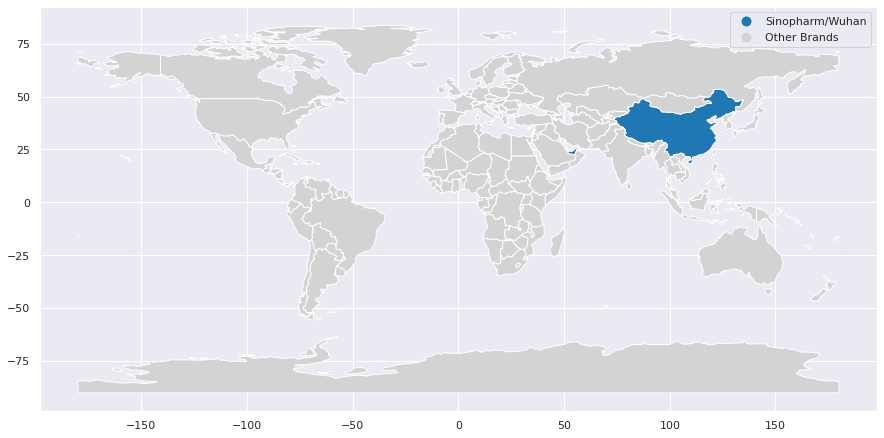

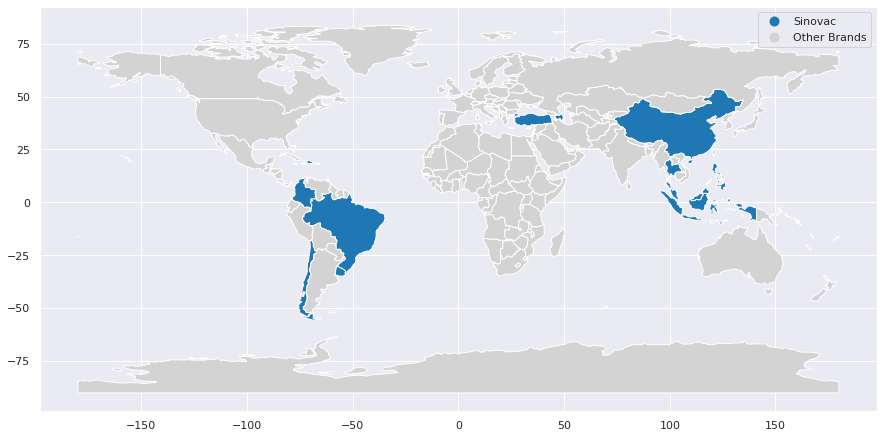

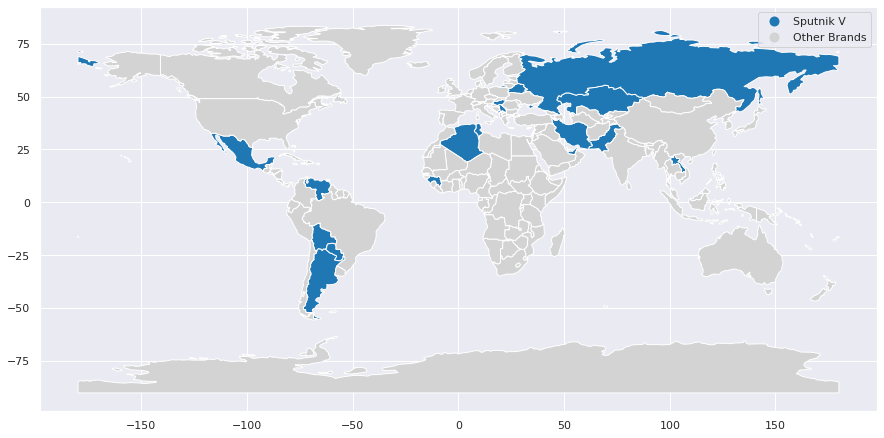

In [ ]:
for vaccin in unique_brands:
    world_copy = world.copy()
    world_copy['vaccines'] = world_copy.apply(lambda row: one_vac_per_country(row, vaccin), axis=1)
    world_copy.plot(column='vaccines', legend=True, figsize=(15, 10), missing_kwds={
    "color": "lightgrey",
    "label": "Other Brands",
})

In [ ]:
df.groupby("date").sum()[["daily_vaccinations","people_vaccinated","people_fully_vaccinated"]].reset_index()

date  daily_vaccinations  people_vaccinated  people_fully_vaccinated
0   01-01-2021            940773.0          1506018.0                      0.0
1   01-02-2021           1018971.0          6759470.0                      0.0
2   01-03-2021           1073647.0          4741835.0                  44004.0
3   01-04-2021           1183203.0          6999116.0                      2.0
4   01-05-2021           1328545.0          7731765.0                      2.0
..         ...                 ...                ...                      ...
93  12-27-2020            612255.0          2523078.0                      0.0
94  12-28-2020            680184.0          2816624.0                      0.0
95  12-29-2020            759579.0           940580.0                      0.0
96  12-30-2020            840220.0          4040429.0                      0.0
97  12-31-2020            878555.0          1453115.0                      0.0

[98 rows x 4 columns]

<h1 class="list-group-item list-group-item-action active" id="europe">IV&nbsp;&nbsp;Focus on Europe</h1>


In [ ]:
df_per = df[df['country'].isin(eu_country_in_df)]

In [ ]:
df_per

country iso_code        date  total_vaccinations  people_vaccinated  \
4064  Lithuania      LTU  12-27-2020              2420.0             2420.0   
5470   Portugal      PRT  12-27-2020              4963.0             4963.0   
1887    Denmark      DNK  12-27-2020              6425.0             6425.0   
2526    Germany      DEU  12-27-2020             23716.0            23716.0   
3536      Italy      ITA  12-27-2020              7150.0             7150.0   
...         ...      ...         ...                 ...                ...   
1115   Bulgaria      BGR  03-20-2021            366547.0           295794.0   
3619      Italy      ITA  03-20-2021           7708889.0          5265495.0   
5553   Portugal      PRT  03-20-2021           1325266.0           892372.0   
2779     Greece      GRC  03-20-2021           1436491.0           977045.0   
1802     Cyprus      CYP  03-20-2021            129438.0            93475.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
4064                      NaN                     NaN                 NaN   
5470                      NaN                     NaN                 NaN   
1887                      NaN                     NaN                 NaN   
2526                      NaN                     NaN                 NaN   
3536                      NaN                     NaN                 NaN   
...                       ...                     ...                 ...   
1115                  70753.0                  3826.0              4092.0   
3619                2443394.0                163596.0            149847.0   
5553                 432894.0                 44857.0             25384.0   
2779                 459446.0                 29427.0             21860.0   
1802                  35963.0                     NaN              2320.0   

      total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
4064                            0.09                           0.09   
5470                            0.05                           0.05   
1887                            0.11                           0.11   
2526                            0.03                           0.03   
3536                            0.01                           0.01   
...                              ...                            ...   
1115                            5.28                           4.26   
3619                           12.75                           8.71   
5553                           13.00                           8.75   
2779                           13.78                           9.37   
1802                           14.78                          10.67   

      people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
4064                                  NaN                             NaN   
5470                                  NaN                             NaN   
1887                                  NaN                             NaN   
2526                                  NaN                             NaN   
3536                                  NaN                             NaN   
...                                   ...                             ...   
1115                                 1.02                           589.0   
3619                                 4.04                          2478.0   
5553                                 4.25                          2489.0   
2779                                 4.41                          2097.0   
1802                                 4.11                          2649.0   

                                          vaccines  \
4064  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
5470                      Moderna, Pfizer/BioNTech   
1887  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
2526  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
3536  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
...                             

In [ ]:
unique_country_vac_df2 = pd.DataFR_dfme(unique_country_vac_list)
unique_country_vac_df2.tail(10)

country iso_code            vaccines
247                            Uganda      UGA  Oxford/AstraZeneca
248                           Jamaica      JAM  Oxford/AstraZeneca
249                           Tunisia      TUN           Sputnik V
250                 Equatorial Guinea      GNQ   Sinopharm/Beijing
251                           Bahamas      BHS  Oxford/AstraZeneca
252                            Malawi      MWI  Oxford/AstraZeneca
253  Saint Vincent and the Grenadines      VCT  Oxford/AstraZeneca
254                              Laos      LAO   Sinopharm/Beijing
255                              Laos      LAO           Sputnik V
256                            Guinea      GIN           Sputnik V

In [ ]:
fig = px.bar(df, x=eu_country_in_df[0:20], y=value[0:20],color=eu_country_in_df[0:20], title= "Top 20 countries with vaccination rates",)
fig.show()

In [ ]:
fig = px.bar(t, x="people_vaccinated_per_hundred", y="country", animation_FR_dfme="date", range_x =(0,90), color='country',text="people_vaccinated_per_hundred",title='<span style="font-size:36px; font-family:Times New Roman">5 best country in term of vaccination per hundred in EUROPE</span>')
fig.show()

In [ ]:
fig = px.choropleth(
    df_per,                            # Input DataFR_dfme
    locations="iso_code",           # identify country code column
    color="total_vaccinations",                     # identify representing column
    hover_name="country",              # identify hover name
    animation_FR_dfme="date",
    #category_orders={"FR_dfme": list(sorted(tdf['date'].unique()))},            # identify date column
    color_continuous_scale= 'viridis',
    projection="azimuthal equal area",        # select projection
    range_color=[0,5000000],
    title='<span style="font-size:36px; font-family:Times New Roman">Total vaccination in EUROPE</span>',
)             # select range of dataset     
fig.show()

<h1 class="list-group-item list-group-item-action active" id="FR_dfnce">V&nbsp;&nbsp;Focus on FR_dfnce</h1>

In [43]:
FR_df = df[df['iso_code'] == 'FRA']
FR_df['cummulative'] = FR_df['total_vaccinations'].cumsum()
fig = px.bar(FR_df, x="date", y="cummulative", title='Cummulative Daily Vaccinations across FR_dfnce')
fig.show()

In [44]:
fig = px.line(FR_df, x="date", y="people_vaccinated", title='Cummulative Vaccinations FR_dfnce')
fig.show()

In [45]:
fig = px.line(FR_df, x="date", y="people_fully_vaccinated", title='People fully vaccinated France')
fig.show()

In [46]:
fig = px.line(FR_df, x="date", y="daily_vaccinations_per_million", title='Vaccination per million in France')
fig.show()

In [51]:
fig = px.choropleth(FR_df,                            # Input DataFR_dfme
                     locations="iso_code",           # identify country code column
                     color="cummulative",                     # identify representing column
                     hover_name="country",              # identify hover name
                     animation_frame="date",        # identify date column
                     projection="robinson",        # select projection
                     color_continuous_scale= 'magma',  # select prefer color scale
                     range_color=[0,150000000],
                     scope="europe",
                   title='<span style="font-size:36px; font-family:Times New Roman">Total vaccination in France</span>',)             # select range of dataset     
fig.show()          
fig.write_html("example_map.html")  

## France in detail

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a3d2224-f111-44aa-b97f-aee763a183e2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [55]:
france_vaccination_df = pd.read_csv("../data/donnees-vaccination-par-tranche-dage-type-de-vaccin-et-departement.csv", delimiter=";")     
display(france_vaccination_df)

date_reference semaine_injection Region_residence Libelle_region  \
0          2022-10-02           2020-52                1     Guadeloupe   
1          2022-10-02           2020-52                1     Guadeloupe   
2          2022-10-02           2020-52                1     Guadeloupe   
3          2022-10-02           2020-52                1     Guadeloupe   
4          2022-10-02           2020-52                1     Guadeloupe   
...               ...               ...              ...            ...   
714793     2022-10-02           2022-39     Toute région         FRANCE   
714794     2022-10-02           2022-39     Toute région         FRANCE   
714795     2022-10-02           2022-39     Toute région         FRANCE   
714796     2022-10-02           2022-39     Toute région         FRANCE   
714797     2022-10-02           2022-39     Toute région         FRANCE   

       departement_residence libelle_departement  population_insee classe_age  \
0           Tout département              FRANCE           50545.0      00-11   
1           Tout département              FRANCE           50545.0      00-11   
2           Tout département              FRANCE           50545.0      00-11   
3           Tout département              FRANCE           50545.0      00-11   
4           Tout département              FRANCE           50545.0      00-11   
...                      ...                 ...               ...        ...   
714793      Tout département              FRANCE        67813396.0   TOUT_AGE   
714794      Tout département              FRANCE        67813396.0   TOUT_AGE   
714795      Tout département              FRANCE        67813396.0   TOUT_AGE   
714796      Tout département              FRANCE        67813396.0   TOUT_AGE   
714797      Tout département              FRANCE        67813396.0   TOUT_AGE   

       libelle_classe_age                            type_vaccin  ...  \
0           de 0 à 11 ans              COMIRNATY Pfizer-BioNTech  ...   
1           de 0 à 11 ans               COVID-19 Vaccine Moderna  ...   
2           de 0 à 11 ans                  VAXZEVRIA AstraZeneca  ...   
3           de 0 à 11 ans               COVID-19 Vaccine Janssen  ...   
4           de 0 à 11 ans  COMIRNATY Pfizer-BioNTech pédiatrique  ...   
...                   ...                                    ...  ...   
714793           Tout âge                  VAXZEVRIA AstraZeneca  ...   
714794           Tout âge               COVID-19 Vaccine Janssen  ...   
714795           Tout âge  COMIRNATY Pfizer-BioNTech pédiatrique  ...   
714796           Tout âge                                Novavax  ...   
714797           Tout âge                            Tout vaccin  ...   

        taux_cumu_1_inj  taux_cumu_termine        date  Effectif_rappel  \
0                   NaN                NaN  2021-01-03              NaN   
1                   NaN                NaN  2021-01-03              NaN   
2                   NaN                NaN  2021-01-03              NaN   
3                   NaN                NaN  2021-01-03              NaN   
4                   NaN                NaN  2021-01-03              NaN   
...                 ...                ...         ...              ...   
714793            0.065              0.053  2022-10-02              NaN   
714794            0.016              0.016  2022-10-02              NaN   
714795            0.004              0.003  2022-10-02              NaN   
714796            0.000              0.000  2022-10-02              NaN   
714797            0.799              0.786  2022-10-02          13660.0   

        Effectif_cumu_rappel  Effectif_rappel_parmi_eligible  \
0                        NaN                             NaN   
1                        NaN                             NaN   
2                        NaN                             NaN   
3                        NaN                             NaN   
4                        NaN       